# Packages

In [3]:
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from rpy2.robjects import r, pandas2ri


/home/divar/projects/geometric-sampling/jupenv/lib/python3.12/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/home/divar/projects/geometric-sampling", R: "/home/divar/projects/geometric-sampling/Bardia GFS"
  warnings.warn(
/home/divar/projects/geometric-sampling/jupenv/lib/python3.12/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "LD_LIBRARY_PATH" redefined by R and overriding existing variable. Current: "/usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server", R: "/usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server:/usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server"
  warnings.warn(
/home/divar/projects/geometric-sampling/jupenv/lib/python3.12/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "R_LIBS_SITE" redefined by R and overriding existing 

In [4]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

In [5]:
import sys
sys.path.append('/home/divar/projects/geometric-sampling')
import geometric_sampling

In [6]:
import geometric_sampling as gs
from geometric_sampling.search.astar import AStar
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT



# R Different Populations

In [7]:
%%R
#install.packages("sampling")
library(sampling)

# Simu The best

## R Popu

[1] 284
[1] 281
[1] 0.03558719
[1] 281  10
x_NHT, y_NHT -0.09688599 x, z 0.6220058 z_NHT, y_NHT 0.3686541 
   sysxy    maxxy    midxy    tilxy    srsxy 
 71983.8 105923.7 105055.0 105892.5 163382.8 
     sysy      maxy      midy      tily      srsy 
194350006 159224000 138697319 158805848 304952003 
x threshold 71983.8 
 y threshold 138697319 
[1] 281  10


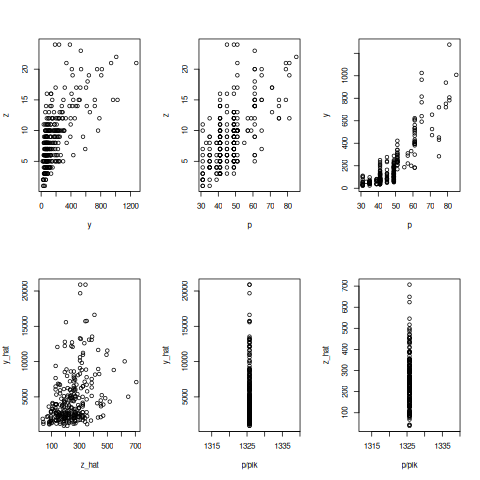

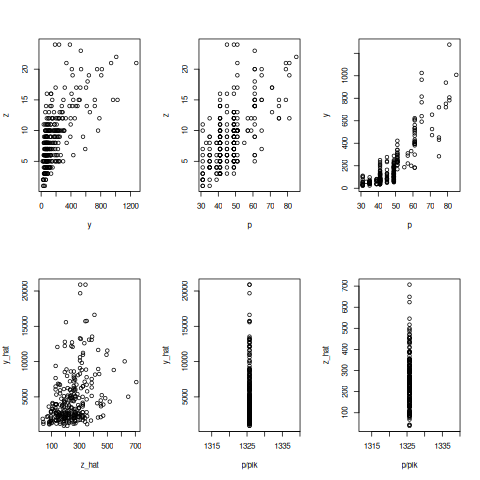

In [8]:
%%R

library(sampling)

#MU284 Sweden
data(MU284)
print(length(MU284[,1]))
MU284 = MU284[MU284$P85<200,]
print(length(MU284[,1]))
set.seed(120)
MU284 = MU284[sample(length(MU284[,1])),]
#MU284 = MU284[order(-MU284$ME84),]
y5 = MU284$RMT85
x5 = MU284$P85/100
g5 = MU284$P75/100
v5 = MU284$S82/1000
h5 = MU284$ME84/1000
w5 = MU284$REV84/1000


P85 = MU284$P85
P75 = MU284$P75
S82 = MU284$S82
CS82 = MU284$CS82
SS82 = MU284$SS82
ME84 = MU284$ME84
REV84 = MU284$REV84
REG = MU284$REG
RMT85 = MU284$RMT85



N = length(REV84)
r <- runif(N, .1, .8)
e <- rep (1, N)





y <- RMT85; z <- CS82; p <- P75 # be rahe!
y <- RMT85; z <- CS82; p <- S82
#  y <- RMT85; z <- CS82; p <- SS82
#  y <- RMT85; z <- CS82; p <- e 



N = length(y)
n = 10
print(n/N)
pik <- inclusionprobabilities(p, n)
print(c(N, n))
##########################
### Variance of Rivals ###
##########################
pikl_sys = UPsystematicpi2(pik)
pikl_max = UPmaxentropypi2(pik)
pikl_mid = UPmidzunopi2(pik)
pikl_til = UPtillepi2(pik)

z_hat = z / pik

var__sys <- t(z_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% z_hat
var__max <- t(z_hat) %*% (pikl_max - (pik %*% t(pik))) %*% z_hat
var__mid <- t(z_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% z_hat
var__til <- t(z_hat) %*% (pikl_til - (pik %*% t(pik))) %*% z_hat
var__srs <- (N**2)*(1-n/N)*(1/n)*var(z)

y_hat = y/pik

var__sys_y <- t(y_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% y_hat
var__max_y <- t(y_hat) %*% (pikl_max - (pik %*% t(pik))) %*% y_hat
var__mid_y <- t(y_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% y_hat
var__til_y <- t(y_hat) %*% (pikl_til - (pik %*% t(pik))) %*% y_hat
var__srs_y <- (N**2)*(1-n/N)*(1/n)*var(y)




var_z = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z) = c('sysxy', 'maxxy', 'midxy', 'tilxy', 'srsxy')
threshold_z = min(var_z[var_z>0])

var_y = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y )
names(var_y) = c('sysy', 'maxy', 'midy', 'tily', 'srsy')
threshold_y = min(var_y[var_y>0])



#################################
############ Plots and Prints ###
#################################
if(1==1){
  par(mfrow=c(2,3))
  plot(y, z)
  plot(p, z)
  plot(p, y)
  
  plot(z_hat, y_hat)
  plot(p/pik, y_hat)
  
  plot(p/pik, z_hat)
  par(mfrow=c(2,3))
#cat('x,y', cor(x,y), '\n x,z', cor(z, x), '\n y,z', cor(z, y), "\n")
plot(y, z)
plot(p,z)
plot(p,y)

plot(z_hat,y_hat)
plot(p/pik,y_hat)

plot(p/pik,z_hat)


cat("x_NHT, y_NHT", cor(p/pik,y/pik), "x, z", cor(p,z), "z_NHT, y_NHT", cor(z/pik,y/pik) , "\n")

z_hat = z/pik
print(var_z)
print(var_y)
cat("x threshold", threshold_z, "\n", "y threshold", threshold_y, "\n")


#cat("x_NHT, y_NHT", cor(p/pik,y/pik), "x, z", cor(x,z), "z_NHT, y_NHT", cor(z/pik,y/pik))
Final_result = cbind(y,z, y_hat, z_hat, pik, abs((y_hat- z_hat)/y_hat))

print(c(N,n))

}


In [9]:
%%R
Ppi <- function(Pi) {
  
  N <- length(Pi)
  #SOME ERROR MESSAGES
  if (N < 2) {
    rlang::abort("The sampling designs should be define on a set of more than one element. (length(Pi) > 1)")
  }
  
  for (k in 1:N) {
    if (Pi[k] >= 1 | Pi[k] <= 0) {
      rlang::abort("Pi is not a vector of probabilities (0 <= p < 1)")
    }
  }
  
  if (as.integer(round( sum(Pi) , 9)) - round( sum(Pi) , 9) != 0) {
    rlang::abort("The sum of the first order inclusion probabilities should be an integer")
  }
  
  
  s <- c()
  c <- c()
  kr <- c()
  alpha <-c()
  sum <-0
  r<-1
  r_prev<-0
  n_<-sum(Pi)
  
  for (k in 1:N) {
    prev_sum<-sum
    sum<-sum+Pi[k]
    if (sum>=r)
    {
      kr[r] <- k
      alpha[k] <-r-prev_sum
      
      int <- sqrt( (1 - Pi[k]) / (1 - alpha[k]) )
      s[k] <- round(int, 8)
      r_prev<-r
      r<-r+1
    }
    
    else {
      inter <- sqrt( Pi[k] / (r_prev + 1 - prev_sum) )
      s[k] <- round(inter, digits = 15)
    }
    
    c[k] <- sqrt(1 - s[k]^2)
    
  }
  
  # ce point n'est pas joli, mais je n'ai pas trouvé l'erreur. A retravailler..
  #print(kr)
  if(max(kr)!=length(Pi)){
    kr<-cbind(kr,length(Pi))
    r<-r+1
    r_prev<-r_prev+1}
  #print(kr)
  V <- matrix(0, nrow = N , ncol = r_prev)
  V[1, 1] = 1
  if ((r_prev-1) != 0) {
    for (r in 1:(r_prev-1)) {
      V[kr[r] + 1, r + 1] = 1
    }
  }
  
  for (k in 1:(N-1)) {
    L <- V[k, ]
    M <- V[k + 1,]
    V[k, ] <- s[k] * L - c[k] * M
    V[k + 1, ] <- c[k] * L + s[k] * M
  }
  return(V)
}




Drawing_Dsd <- function(v, s = 1, B = FALSE, seed = NULL){
  
  
  if (is.numeric(v)) {
    return(.dsd_sampling_mult(v, s, B, seed))
  }
  else{ return(.dsd_sampling_mult_complex(v, s, B, seed))}
}


.dsd_sampling_mult_complex <- function(v, s, B, seed){
  
  if (s == 1) {
    return(.dsd_sampling_01_B_C_complex(v, B, seed))
  }
  
  else{
    echant <- replicate(s, .dsd_sampling_01_B_C_complex(v, B, seed))
    colnames(echant) <- paste("Sample", 1:s)
    return(echant)
  }
}


.dsd_sampling_mult <- function(v = NULL, s, B,seed){
  
  if (s == 1) {
    return(.dsd_sampling_01_B_C(v, B, seed))
  }
  else{
    echant <- replicate(s, .dsd_sampling_01_B_C(v, B, seed))
    colnames(echant) <- paste("Sample", 1:s)
    return(echant)
  }
}

.dsd_sampling_01_B_C_complex <- function(v, B = TRUE, seed){
  
  indices <- .data <- NULL
  
  N <- nrow(v)
  n <- ncol(v)
  echant <- rep(0, N)
  
  if (!is.null(seed)) {
    set.seed(seed)
  }
  ref <- stats::runif(n)
  
  #Step 1: Sampling the first element
  w <- v
  
  total <- 0
  i <- 0
  pi1 <- Re( diag( v %*% t(Conj(v)) ) )
  
  if (length(pi1[pi1 < 0]) != 0 | length(pi1[pi1 >= 1]) != 0) {
    rlang::abort("The matrix v given as input doesn't suit to the input expected (See the functions pgd and periodic_dsd)")
  }
  
  while (total < ref[1]) {
    i <- i + 1
    total <- total + ( pi1[i] / n )
  }
  echant[i] <- 1
  
  M <- v[i,]
  e1 <- M / c(Re (sqrt (t(M) %*% Conj(M)) ) )
  
  
  #Step 2: Sampling the n-1 others elements
  for (j in 1:(n-1)) {
    
    r <- n-j
    inter <- v %*% Conj(e1)
    pi1 <- pi1 - t(inter * Conj(inter))
    pi2 <- Re( 1 / r*pi1 )
    
    
    total <- 0
    i <- 0
    
    while (total < ref[j+1]) {
      i <- i + 1
      total <- total + pi2[i]
    }
    echant[i] <- 1
    
    
    w <- w - t( t(Conj(e1)) %*% t(w) ) %*% t(e1)
    L <- w[i, ]
    e1 <- L / c(Re(sqrt (t(L) %*% Conj(L) )))
    
  }
  
  if(B) {
    return(echant)
  }
  else {
    return((1:N)[echant==1])
  }
  
}
.dsd_sampling_01_B_C <- function(v = NULL, B = TRUE, seed){
  
  indices <- .data <- NULL
  
  N <- nrow(v)
  n <- ncol(v)
  echant <- rep(0, N)
  
  if (!is.null(seed)) {
    set.seed(seed)
  }
  ref <- stats::runif(n)
  
  #First step: Sampling the first element
  w <- v
  
  
  total <- 0
  i <- 0
  pi1 <- diag(v  %*% t(v))
  
  while (total < ref[1]) {
    i <- i + 1
    total <- total + ( pi1[i] / n )
  }
  echant[i] <- 1
  
  
  l <- v[i,]
  e1 <- l / as.numeric( sqrt( t(l) %*% l ) )
  
  
  #Step 2: Sampling the n-1 others elements
  for (j in 1:(n-1)) {
    
    r <- n-j
    inter <- (v %*% e1)
    pi1 <- pi1 - t( inter * inter )
    pi2 <- 1 / r * pi1
    
    
    total <- 0
    i <- 0
    
    while (total < ref[j+1]) {
      i <- i + 1
      total <- total + pi2[i]
    }
    echant[i] <- 1
    
    
    
    w <- w - (w %*% e1) %*% t(e1)
    L <- w[i,]
    e1 <- L / as.numeric( sqrt( t(L) %*% L ))
    
  }
  if(B) {
    return(echant)
  }
  else {
    return((1:N)[echant==1])
  }
  
}

In [10]:
%%R
library(sampling)



#pik <- inclusionprobabilities(p, n)

sort_index <- order(z / pik, decreasing = TRUE)
y <- y[sort_index]; z <- z[sort_index]; pik <- pik[sort_index]
N <- length(y)


Base <- Ppi(pik)
Ppi_mat <- Base %*% t(Base)

# Variance matrix formula
Dpi_inv <- diag(1 / pik)
I_N <- diag(N)
A <- (I_N - Ppi_mat) * Ppi_mat
var_ht_z <- as.numeric(t(z) %*% Dpi_inv %*% A %*% Dpi_inv %*% z)
cat("Variance of HT estimator via DSD formula_z: ", var_ht_z, "\n")

var_ht <- as.numeric(t(y) %*% Dpi_inv %*% A %*% Dpi_inv %*% y)
cat("Variance of HT estimator via DSD formula: ", var_ht, "\n")


# Monte Carlo
# Number of repetitions
m <- 2000
ht_estimates_dsd_y <- numeric(m)
ht_estimates_dsd_z <- numeric(m)
ht_estimates_cube_y <- numeric(m)
ht_estimates_cube_z <- numeric(m)

for (i in 1:m) {
  # --- Determinantal Sampling ---
  samp <- Drawing_Dsd(Base, s = n, B = TRUE)
  sel_idx <- which(samp[, 1] == 1)  # Adjust if needed
  ht_estimates_dsd_y[i] <- sum(y[sel_idx] / pik[sel_idx])
  ht_estimates_dsd_z[i] <- sum(z[sel_idx] / pik[sel_idx])
  
  # --- Cube Method Sampling ---
  # If you want to balance on z, make sure to use cube method with z in the auxiliary matrix
  cube_sample <- samplecube(cbind(pik, z), pik, comment = FALSE)
  sel_cube <- which(cube_sample == 1)
  ht_estimates_cube_y[i] <- sum(y[sel_cube] / pik[sel_cube])
  ht_estimates_cube_z[i] <- sum(z[sel_cube] / pik[sel_cube])
}
var_y_0 = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y)
names(var_y_0) = c('syszy', 'maxzy', 'midzy', 'tilzy', 'srszy')

var_z_0 = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z_0) = c('sysz', 'maxz', 'midz', 'tilz', 'srsz')

threshold_z = min(var_z_0)
threshold_y = min(var_y_0)

# --- Variance and Mean calculations ---
var_dsd_y   <- var(ht_estimates_dsd_y)
var_cube_y  <- var(ht_estimates_cube_y)
var_dsd_z   <- var(ht_estimates_dsd_z)
var_cube_z  <- var(ht_estimates_cube_z)
mean_dsd_y  <- mean(ht_estimates_dsd_y)
mean_cube_y <- mean(ht_estimates_cube_y)
mean_dsd_z  <- mean(ht_estimates_dsd_z)
mean_cube_z <- mean(ht_estimates_cube_z)

cat("Here is the Vincent Efficiency y:\n")
eff_dsd_y <- min(var_y_0[var_y_0>0]) / var_ht
eff_dsd_z <- min(var_z_0[var_z_0>0]) / var_ht_z
cat(sprintf("  DSD_y:  %.5f\n  DSD_z: %.5f\n", eff_dsd_y, eff_dsd_z))


cat("Monte Carlo variance of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", var_dsd_y, var_cube_y))

eff_dsd_y <- min(var_y_0) / var_dsd_y
eff_cube_y <- min(var_y_0) / var_cube_y

cat("Monte Carlo efficiency of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", eff_dsd_y, eff_cube_y))

cat("Monte Carlo mean of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", mean_dsd_y, mean_cube_y))
cat(sprintf("  Actual total of y: %.5f\n", sum(y)))

cat("\nMonte Carlo variance of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", var_dsd_z, var_cube_z))

eff_dsd_z <- min(var_z_0) / var_dsd_z
eff_cube_z <- min(var_z_0) / var_cube_z

cat("Monte Carlo efficiency of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", eff_dsd_z, eff_cube_z))

cat("Monte Carlo mean of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", mean_dsd_z, mean_cube_z))
cat(sprintf("  Actual total of z: %.5f\n", sum(z)))

Variance of HT estimator via DSD formula_z:  7809.425 
Variance of HT estimator via DSD formula:  127891482 
Here is the Vincent Efficiency y:
  DSD_y:  1.08449
  DSD_z: 9.21755
Monte Carlo variance of HT estimator for y:
  DSD:  131595681.24345
  Cube: 133770707.53069
Monte Carlo efficiency of HT estimator for y:
  DSD:  1.05397
  Cube: 1.03683
Monte Carlo mean of HT estimator for y:
  DSD:  53609.63500
  Cube: 53136.75710
  Actual total of y: 53151.00000

Monte Carlo variance of HT estimator for z:
  DSD:  7570.47244
  Cube: 15823.62823
Monte Carlo efficiency of HT estimator for z:
  DSD:  9.50850
  Cube: 4.54913
Monte Carlo mean of HT estimator for z:
  DSD:  2505.42349
  Cube: 2512.55397
  Actual total of z: 2508.00000


In [11]:
%%R
results = round(c(var__srs/min(var_z_0), var__srs/var_cube_z, var__srs/var_ht_z,  var__srs_y/min(var_y_0), var__srs_y/var_cube_y,var__srs_y/var_ht ),2)
names(results) = c('eff_GFS_0_z','eff_cube_z', 'eff_dsd_z', 'eff_GFS_0_y' , 'eff_cube_y','eff_dsd_y')
print(results)

eff_GFS_0_z  eff_cube_z   eff_dsd_z eff_GFS_0_y  eff_cube_y   eff_dsd_y 
       2.27       10.33       20.92        2.20        2.28        2.38 


In [12]:
%%R
round(cor(MU284),2)

      LABEL   P85   P75 RMT85  CS82 SS82   S82  ME84 REV84   REG    CL
LABEL  1.00 -0.18 -0.15 -0.17 -0.56 0.11 -0.17 -0.17 -0.15  0.83  1.00
P85   -0.18  1.00  1.00  0.99  0.67 0.65  0.87  0.99  0.91 -0.19 -0.18
P75   -0.15  1.00  1.00  0.99  0.64 0.68  0.87  0.99  0.90 -0.17 -0.15
RMT85 -0.17  0.99  0.99  1.00  0.66 0.65  0.85  0.99  0.91 -0.19 -0.16
CS82  -0.56  0.67  0.64  0.66  1.00 0.15  0.62  0.65  0.61 -0.45 -0.56
SS82   0.11  0.65  0.68  0.65  0.15 1.00  0.75  0.66  0.60  0.02  0.12
S82   -0.17  0.87  0.87  0.85  0.62 0.75  1.00  0.85  0.80 -0.15 -0.17
ME84  -0.17  0.99  0.99  0.99  0.65 0.66  0.85  1.00  0.91 -0.19 -0.16
REV84 -0.15  0.91  0.90  0.91  0.61 0.60  0.80  0.91  1.00 -0.14 -0.15
REG    0.83 -0.19 -0.17 -0.19 -0.45 0.02 -0.15 -0.19 -0.14  1.00  0.83
CL     1.00 -0.18 -0.15 -0.16 -0.56 0.12 -0.17 -0.16 -0.15  0.83  1.00


## Astar

In [ ]:
y = np.array(ro.r['y'])
z = np.array(ro.r['z'])
inclusions = np.array(ro.r['pik'])

print('cor(y, z)', np.corrcoef(y, z)[0, 1])
print('cor(y, inclusions)', np.corrcoef(y, inclusions)[0, 1])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
var_y_0 = np.array(ro.r['var_y_0'])
var_z_0 = np.array(ro.r['var_z_0'])
eff_dsd_z = float(ro.r['eff_dsd_z'][0])
eff_dsd_y = float(ro.r['eff_dsd_y'][0])
inclusions = np.array(ro.r['pik'])
threshold_z = float(ro.r['threshold_z'][0])
threshold_y = ro.r['threshold_y']
threshold_z = float(ro.r['var_ht_z'][0])
threshold_y = float(ro.r['var_ht'][0])

inclusions = np.array(inclusions)

import numpy as np

num_new_nodes          = 20
num_changes_lower      = 1
num_changes_upper      = 1
max_open_set_size      = 200000
switch_lower           = .9
switch_upper           = .9
max_iterations         = 2000
num_initial_nodes      = 1
initial_design_to_use  = 1
num_top_restart_nodes  = 10
stuck_fraction         = 0.99

swap_iterations        = int(np.round(.7 * num_initial_nodes))  # ensure integer!
swap_distance          = 3
swap_units             = int(N/5)







show_results           = 1
random_restart_period  = 10000   # how often to inject random designs
random_injection_count = 500     # how many random designs to inject
prune_fraction         = .9
var_percent_exected    = 0  # how much of the variance to expect in the best design



rng = np.random.default_rng()  # Recommended for controlled/stable random runs
print(max_iterations, num_new_nodes, max_open_set_size, switch_lower, switch_upper)

# You must define y, z, inclusions, threshold_z, threshold_y earlier in your notebook or script.

# Criterion must be set up per your class structure.
criterion = VarNHT(main_variable=y, auxiliary_variable=z, 
                   inclusion_probability=inclusions, balance_method='linear')

astar = AStar(
    inclusions              = inclusions,
    num_initial_nodes       = num_initial_nodes,
    initial_design_to_use   = initial_design_to_use,
    criteria                = criterion,
    z                       = z,
    y                       = y,
    threshold_z             = threshold_z,
    threshold_y             = threshold_y,
    switch_lower            = switch_lower,
    switch_upper            = switch_upper,
    num_changes_lower       = num_changes_lower,
    num_changes_upper       = num_changes_upper,
    show_results            = show_results,
    var_percent_exected     = var_percent_exected,
    swap_iterations         = swap_iterations,
    swap_distance           = swap_distance,
    swap_units              = swap_units,
    rng                     = rng,                
    # atomize                 = False,                        
    # delta                   = 0.01,                         
)

result = astar.run(
    max_iterations             = max_iterations,
    num_new_nodes              = num_new_nodes,
    max_open_set_size          = max_open_set_size,
    random_restart_period      = random_restart_period,
    random_injection_count     = random_injection_count,
    prune_fraction             = prune_fraction,
    num_top_restart_nodes      = num_top_restart_nodes,
    stuck_fraction             = stuck_fraction,

)

print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
# print(np.round(var_z_0, 1))
# print(np.round(var_y_0, 1))
astar.initial_design.show()
astar.best_design.show()

cor(y, z) 0.6574759317818599
cor(y, inclusions) 0.8488254185182789
2000 20 200000 0.9 0.9


/tmp/ipykernel_804778/1663707489.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  swap_units             = int(N/5)
Generating initial designs:   0%|                         | 0/1 [00:00<?, ?it/s]

Initial design 0: method = Original, efficiency z = 0.2584, y=1.1947
New best at idx=0: method = Original, efficiency z = 0.2584 and efficiency y = 1.1947


Generating initial designs: 100%|█████████████████| 1/1 [00:00<00:00, 35.01it/s]


Progress: 0.0% 

Progress: 0.1% 
=== Best Solution Updated at Iteration 1 ===
  Balancing Method:    origine
  Real and E(.) z,y:   2508→2508.0, 53151→53151.0
  Best Cost (z):       29601.296
  Best Cost (y):       105880678.5172
  number of new noded: 20
  rho (z, y):          0.657
  rho (z_hat, y_hat):  0.369
  rho (p, y):          0.849
  Criteria Value:      12.416
  Efficiency z (0→f):  0.258 → 0.258 → dsd 0.2638→ cube 0.0
  Efficiency y (0→f):  1.195 → 1.195 → dsd 1.2079→ cube 0.0
  Efficiency z (srs):  5.388 → 0.258 → 5.4998
  Efficiency y (srs):  2.839 → 1.195 → 2.8699
  Alpha:               None
  Num changes:         None
  Design Depth:        2
  Design Size (|D|):   285
  Open set size:       36

Progress: 0.5% 
=== Best Solution Updated at Iteration 10 ===
  Balancing Method:    origine
  Real and E(.) z,y:   2508→2508.0, 53151→53151.0
  Best Cost (z):       29530.122
  Best Cost (y):       105730055.5599
  number of new noded: 20
  rho (z, y):          0.657
  rho (z_hat, y_hat):  0.369

In [ ]:
#print(inclusions)
print("size of init design",len(list(astar.initial_design)))
print("size of best design", len(list(astar.best_design)))
#print(astar.initial_design.criteria_value())
print(astar.criteria(astar.initial_design))
print(astar.criteria(astar.best_design))
for k in range(int(N)):
    size_last = 0
    prob_last = 0
    len_last = 0
    prob_last_second = 0
    prob = 0
    for item in astar.best_design:
        prob += item.probability
        size_last += 1
        len_last += len(item.ids)
        if k in item.ids:
            prob_last += item.probability
            if k+1 in item.ids:
                prob_last_second += item.probability
        #print(item)
    size_ini = 0
    prob_ini = 0
    len_ini = 0
    prob_ini_second = 0
    for item in astar.initial_design:
        len_ini += len(item.ids)
        size_ini += 1
        if k in item.ids:
            prob_ini += item.probability
            if k+1 in item.ids:
                prob_ini_second += item.probability
        #print(item)
    #print(np.round(prob_last, 3), np.round(prob_ini, 3), np.round(inclusions[k], 3))
    if  not (len_last%n == 0 and len_ini%n == 0 and 
        np.round(prob_last, 3) == np.round(prob_ini, 3) and 
        np.round(prob_last, 3) == np.round(inclusions[k], 3)):
        print('yes')
print(prob)

In [ ]:
# for astar_with_details
y = np.array(ro.r['y'])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
var_y_0 = np.array(ro.r['var_y_0'])
inclusions = np.array(ro.r['pik'])
shifted_x   = np.array(ro.r['z'])
threshold_z = float(ro.r['threshold_z'][0])
threshold_z = threshold_z * .7
threshold_y = ro.r['threshold_y']
inclusions = np.array(inclusions)
x = np.array(shifted_x)


max_open_set_size, switch_coefficient= 200000,  .5
num_initial_nodes = 100
elitism_k = 10
show_results = 1
random = 0
max_iterations = 10000
local_search_every = 10
n_jobs = -1




for max_num_changes in [10]:
      for num_new_nodes in [10]:
            print(max_iterations, num_new_nodes, max_open_set_size, max_num_changes, switch_coefficient)
            AsDesign = Design(inclusions=inclusions)
            criterion = VarNHT(main_variable=y, auxiliary_variable=x, inclusion_probability=inclusions)
            astar = AStar_elit(inclusions=inclusions, 
                          num_initial_nodes=num_initial_nodes,
                          criteria=criterion,
                          threshold_z=threshold_z,
                          threshold_y=threshold_y,
                          switch_coefficient=switch_coefficient, 
                          show_results=show_results, 
                          elitism_k=elitism_k)
            result = astar.run(
                    max_iterations=max_iterations,
                    num_new_nodes=num_new_nodes,        # Or whatever value you want to test!
                    max_open_set_size=max_open_set_size,
                    max_num_changes=max_num_changes,
                    local_search_every=local_search_every,
                    n_jobs=n_jobs
                )
            print("Best criteria value:", astar.best_criteria_value)
            print("Iterations run:", result)
            print(var_y_0)
            astar.initial_design.show()
            astar.best_design.show()
